In [30]:
!pip install -q pyomo

In [31]:
#Below snip of code install the GLPK solver into current python session
!apt-get install -y -qq glpk-utils

In [32]:
from pyomo.environ import *

  \begin{equation}
            min_{\bar{x}; y} \ \  0.043x_1 + 0.027x_2 + 0.025x_3 + 0.022x_4 + 0.045x_5 - 0.0275y
    \end{equation}
    subject to
    \begin{equation}
        x_1 + 3x_2 + x_3 + 7x_4 + x_5 - y \leq 100
    \end{equation}
    \begin{equation}
        x_2 + 2x_3 + 4x_4 \geq 60
    \end{equation}
    \begin{equation}
        \frac{2x_1 + 2x_2 + x_3 + x_4 + 5x_5}{x_1 - x_2 + x_3 - x_4 + x_5} \leq 2.8
    \end{equation}
    \begin{equation}
        \frac{2x_1 + 15x_2 + 4x_3 + 3x_4 - 8x_5}{x_1 + x_2 + x_3 - x_5} \leq 3
    \end{equation}
    \begin{equation}
        x_1,x_2,x_3,x_4,x_5 \geq 0
    \end{equation}
    \begin{equation}
        y \in [0,2.5]
    \end{equation}

In [33]:
#Question 1

model = [ConcreteModel() for i in range(4)]
def constraintmaker(model, i):
  if i==0: #then denominator of both the equation are greater than 0
    model[i].constraints.add(model[i].x[0] - model[i].x[1] + model[i].x[2] - model[i].x[3] + model[i].x[4] >= 0)
    model[i].constraints.add(model[i].x[0] + model[i].x[1] + model[i].x[2] - model[i].x[4] >= 0)
    model[i].constraints.add(-0.8*model[i].x[0]+4.8*model[i].x[1]-1.8*model[i].x[2]+3.8*model[i].x[3]+2.2*model[i].x[4] <= 0)
    model[i].constraints.add(-1*model[i].x[0]+12*model[i].x[1]+model[i].x[2]+3*model[i].x[3]-5*model[i].x[4] <= 0)
  if i==1: #when denominator of both the eqaution is less than 0
    model[i].constraints.add(model[i].x[0] - model[i].x[1] + model[i].x[2] - model[i].x[3] + model[i].x[4] <= 0)
    model[i].constraints.add(model[i].x[0] + model[i].x[1] + model[i].x[2] - model[i].x[4] <= 0)
    model[i].constraints.add(-0.8*model[i].x[0]+4.8*model[i].x[1]-1.8*model[i].x[2]+3.8*model[i].x[3]+2.2*model[i].x[4] >= 0)
    model[i].constraints.add(-1*model[i].x[0]+12*model[i].x[1]+model[i].x[2]+3*model[i].x[3]-5*model[i].x[4] >= 0)
  if i==2: #when denominator of 1st eqaution is less than 0 and denominator of 2nd is greater than 0
    model[i].constraints.add(model[i].x[0] - model[i].x[1] + model[i].x[2] - model[i].x[3] + model[i].x[4] <= 0)
    model[i].constraints.add(model[i].x[0] + model[i].x[1] + model[i].x[2] - model[i].x[4] >= 0)
    model[i].constraints.add(-0.8*model[i].x[0]+4.8*model[i].x[1]-1.8*model[i].x[2]+3.8*model[i].x[3]+2.2*model[i].x[4] >= 0)
    model[i].constraints.add(-1*model[i].x[0]+12*model[i].x[1]+model[i].x[2]+3*model[i].x[3]-5*model[i].x[4] <= 0)
  if i==3: #when denominator of 1st is greater than 0 and denominator of 2nd is less than 0
    model[i].constraints.add(model[i].x[0] - model[i].x[1] + model[i].x[2] - model[i].x[3] + model[i].x[4] >= 0)
    model[i].constraints.add(model[i].x[0] + model[i].x[1] + model[i].x[2] - model[i].x[4] <= 0)
    model[i].constraints.add(-0.8*model[i].x[0]+4.8*model[i].x[1]-1.8*model[i].x[2]+3.8*model[i].x[3]+2.2*model[i].x[4] <= 0)
    model[i].constraints.add(-1*model[i].x[0]+12*model[i].x[1]+model[i].x[2]+3*model[i].x[3]-5*model[i].x[4] >= 0)

result = [None]*4

for i in range(4):
  model[i].x = Var(range(5), domain=NonNegativeReals)
  model[i].y = Var(domain=NonNegativeReals, bounds=(0,2.5))
  model[i].obj = Objective(expr = 0.043*model[i].x[0] + 0.027*model[i].x[1] + 0.025*model[i].x[2] + 0.022*model[i].x[3] + 0.045*model[i].x[4] - 0.0275*model[i].y, sense= minimize)

  model[i].constraints = ConstraintList()

  model[i].constraints.add(expr = model[i].x[0] + 3*model[i].x[1] + model[i].x[2] + 7*model[i].x[3] + model[i].x[4] - model[i].y <= 100)
  model[i].constraints.add(expr = model[i].x[1] + 2*model[i].x[2] + 4*model[i].x[3] >= 60)
  model[i].variableconstraint = Constraint(rule = constraintmaker(model, i))
  result[i] = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model[i])




In [34]:
#Finding Objective of all Cases

for i in range(4):
  try:
    print("For Case {i} the Solver Status is : ".format(i=i+1), result[i].solver.status)
    print("For Case {i} the Solver Termination Condition is : ".format(i=i+1), result[i].solver.termination_condition)
    print('Cost for Case {i} = '.format(i=i+1), model[i].obj())
  except:
    print("Problem has Status Other than Optimal.")
  print("--------------------------------------------------------------------")


ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0]
    (object: <class 'pyomo.core.base.var._GeneralVarData'>)
No value for uninitialized NumericValue object x[0]
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0]
    (object: <class 'pyomo.core.base.var._GeneralVarData'>)
No value for uninitialized NumericValue object x[0]


For Case 1 the Solver Status is :  ok
For Case 1 the Solver Termination Condition is :  optimal
Cost for Case 1 =  0.8523724489795922
--------------------------------------------------------------------
For Case 2 the Solver Status is :  ok
For Case 2 the Solver Termination Condition is :  optimal
Cost for Case 2 =  0.3595833333333338
--------------------------------------------------------------------
For Case 3 the Solver Status is :  ok
For Case 3 the Solver Termination Condition is :  other
Problem has Status Other than Optimal.
--------------------------------------------------------------------
For Case 4 the Solver Status is :  ok
For Case 4 the Solver Termination Condition is :  other
Problem has Status Other than Optimal.
--------------------------------------------------------------------


In [35]:
#values of variables
for i in range(4):
  try:
    print('Decision Variables for Case {i}'.format(i=i+1))
    print('x1 = ', model[i].x[0].value)
    print('x2 = ', model[i].x[1].value)
    print('x3 = ', model[i].x[2].value)
    print('x4 = ', model[i].x[3].value)
    print('x5 = ', model[i].x[4].value)
    print('y = ', model[i].y.value)
  except:
    print("Problem has Status Other than Optimal.")

Decision Variables for Case 1
x1 =  0.0
x2 =  0.0
x3 =  19.5918367346939
x4 =  5.20408163265306
x5 =  7.04081632653061
y =  2.5
Decision Variables for Case 2
x1 =  0.0
x2 =  0.0
x3 =  1.66666666666667
x4 =  14.1666666666667
x5 =  1.66666666666666
y =  2.5
Decision Variables for Case 3
x1 =  None
x2 =  None
x3 =  None
x4 =  None
x5 =  None
y =  None
Decision Variables for Case 4
x1 =  None
x2 =  None
x3 =  None
x4 =  None
x5 =  None
y =  None


In [36]:
#constraint list for each case
for i in range(4):
  print("Case {i} :".format(i=i+1))
  try:
    for constraint in model[i].constraints:
      print(f"Constraint {constraint}: {model[i].constraints[constraint]()}")
  except:
    print("Problem might not be optimal")
  print("------------------------------------------------")

ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0]
    (object: <class 'pyomo.core.base.var._GeneralVarData'>)
No value for uninitialized NumericValue object x[0]
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0] + 3*x[1] + x[2] + 7*x[3] + x[4] - y
    (object: <class 'pyomo.core.expr.numeric_expr.LinearExpression'>)
No value for uninitialized NumericValue object x[0]
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0]
    (object: <class 'pyomo.core.base.var._GeneralVarData'>)
No value for uninitialized NumericValue object x[0]
ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0] + 3*x[1] + x[2] + 7*x[3] + x[4] - y
    (object: <class 'pyomo.core.expr.numeric_expr.LinearExpression'>)
No value for uninitialized NumericValue object x[0]


Case 1 :
Constraint 1: 60.56122448979593
Constraint 2: 60.00000000000004
Constraint 3: 21.42857142857145
Constraint 4: 12.55102040816329
Constraint 5: -4.796163466380676e-14
Constraint 6: 2.842170943040401e-14
------------------------------------------------
Case 2 :
Constraint 1: 100.00000000000023
Constraint 2: 60.00000000000014
Constraint 3: -10.83333333333337
Constraint 4: 9.992007221626409e-15
Constraint 5: 54.5000000000001
Constraint 6: 35.83333333333347
------------------------------------------------
Case 3 :
Problem might not be optimal
------------------------------------------------
Case 4 :
Problem might not be optimal
------------------------------------------------


In [37]:

for i in range(4):
  print("For Case {i} the Solver Status is : ".format(i=i+1), result[i].solver.status)
  print("For Case {i} the Solver Termination Condition is : ".format(i=i+1), result[i].solver.termination_condition)
  try:
    # print('Cost for Case {i} = '.format(i=i+1), model[i].obj())
    print('Decision Variables for Case {i}'.format(i=i+1))
    print('x1 = ', model[i].x[0].value)
    print('x2 = ', model[i].x[1].value)
    print('x3 = ', model[i].x[2].value)
    print('x4 = ', model[i].x[3].value)
    print('x5 = ', model[i].x[4].value)
    print('y = ', model[i].y.value)

    for constraint in model[i].contraints:
      print("Constraint: ", constraint)
  except:
    print("Problem has Status Other than Optimal.")

For Case 1 the Solver Status is :  ok
For Case 1 the Solver Termination Condition is :  optimal
Decision Variables for Case 1
x1 =  0.0
x2 =  0.0
x3 =  19.5918367346939
x4 =  5.20408163265306
x5 =  7.04081632653061
y =  2.5
Problem has Status Other than Optimal.
For Case 2 the Solver Status is :  ok
For Case 2 the Solver Termination Condition is :  optimal
Decision Variables for Case 2
x1 =  0.0
x2 =  0.0
x3 =  1.66666666666667
x4 =  14.1666666666667
x5 =  1.66666666666666
y =  2.5
Problem has Status Other than Optimal.
For Case 3 the Solver Status is :  ok
For Case 3 the Solver Termination Condition is :  other
Decision Variables for Case 3
x1 =  None
x2 =  None
x3 =  None
x4 =  None
x5 =  None
y =  None
Problem has Status Other than Optimal.
For Case 4 the Solver Status is :  ok
For Case 4 the Solver Termination Condition is :  other
Decision Variables for Case 4
x1 =  None
x2 =  None
x3 =  None
x4 =  None
x5 =  None
y =  None
Problem has Status Other than Optimal.


In [38]:
#Question 2

In [39]:
#Part 1

Decentralized System: Formulate the optimization model of Refinery D and E at the decentralized
level and describe your formulation along with the variables, objective function, and constraints. Solve
your formulated model of product mix to maximize profit using Pyomo and report your solution.
Assume that 50-50 % is the raw crude oil distribution among D and E refineries.

In [40]:
## PART 1 (a) D PART

In [41]:
# For D we define two variables dx1 and dx2 for product 1 and 2 and calculate optimal mix.
DD = ConcreteModel()

# declaring decision variable for system
DD.dx1 = Var(domain = NonNegativeReals)
DD.dx2 = Var(domain = NonNegativeReals)

# declaring constraints
#Total Time for Distillation for D for products must be less than 80
DD.constraints = ConstraintList()
DD.constraints.add(expr = 4*DD.dx1+2*DD.dx2 <= 80)
#Total Time for Treatment for D for products must be less than 60
DD.constraints.add(expr = 2*DD.dx1+5*DD.dx2 <= 60)
# Total amount for 1 + 2 must be less than 60
DD.constraints.add(expr = DD.dx1+DD.dx2 <= 60)
# declaring objective function for optimization problem
DD.cost = Objective(expr = 10*DD.dx1 + 15*DD.dx2, sense=maximize)
DD.pprint()
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(DD).write()
# display solution
print('\nCost = ', DD.cost())
print('\nDecision Variables')
print('Product 1 = ', DD.dx1())
print('Product 2 = ', DD.dx2())


1 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

2 Var Declarations
    dx1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    dx2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 10*dx1 + 15*dx2

1 Constraint Declarations
    constraints : Size=3, Index=constraints_index, Active=True
        Key : Lower : Body          : Upper : Active
          1 :  -Inf : 4*dx1 + 2*dx2 :  80.0 :   True
          2 :  -Inf : 2*dx1 + 5*dx2 :  60.0 :   True
          3 :  -Inf :     dx1 + dx2 :  60.0 :   True

5 Declar

In [42]:
## PART 1 (b) E PART

# For E we define two variables ex1 and ex2 for product 1 and 2 and calculate optimal mix.
EE = ConcreteModel()

# declaring decision variable for system
EE.ex1 = Var(domain = NonNegativeReals)
EE.ex2 = Var(domain = NonNegativeReals)

# declaring constraints
#Total Time for Distillation for E for products must be less than 80
EE.constraints = ConstraintList()
EE.constraints.add(expr = 5*EE.ex1+3*EE.ex2 <= 60)
#Total Time for Treatment for E for products must be less than 75
EE.constraints.add(expr = 5*EE.ex1+6*EE.ex2 <= 75)
# Total amount for 1 + 2 must be less than 60
EE.constraints.add(expr = EE.ex1+EE.ex2 <= 60)
# declaring objective function for optimization problem
EE.cost = Objective(expr = 10*EE.ex1 + 15*EE.ex2, sense=maximize)
EE.pprint()
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(EE).write()
# display solution
print('\nCost = ', EE.cost())
print('\nDecision Variables')
print('Product 1 = ', EE.ex1())
print('Product 2 = ', EE.ex2())

1 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

2 Var Declarations
    ex1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    ex2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 10*ex1 + 15*ex2

1 Constraint Declarations
    constraints : Size=3, Index=constraints_index, Active=True
        Key : Lower : Body          : Upper : Active
          1 :  -Inf : 5*ex1 + 3*ex2 :  60.0 :   True
          2 :  -Inf : 5*ex1 + 6*ex2 :  75.0 :   True
          3 :  -Inf :     ex1 + ex2 :  60.0 :   True

5 Declar

In [43]:
#  PART 2 Centralised
# For D we define two variables dx1 and dx2 for product 1 and 2 and calculate optimal mix.
c = ConcreteModel()

# declaring decision variable for system
c.dx1 = Var(domain = NonNegativeReals)
c.dx2 = Var(domain = NonNegativeReals)
c.ex1 = Var(domain = NonNegativeReals)
c.ex2 = Var(domain = NonNegativeReals)

# declaring constraints

#Total Time for Distillation for D for products must be less than 80 and less than 60 for E
c.constraints = ConstraintList()
c.constraints.add(expr = 4*c.dx1+2*c.dx2 <= 80)
c.constraints.add(expr = 5*c.ex1+3*c.ex2 <= 60)

#Total Time for Treatment for D for products must be less than 60 and less that 75 for E
c.constraints.add(expr = 2*c.dx1+5*c.dx2 <= 60)
c.constraints.add(expr = 5*c.ex1+6*c.ex2 <= 75)


# Total amount for 1 + 2 + 1 + 2 must be less than 120
c.constraints.add(expr = c.dx1+c.dx2+c.ex1+c.ex2 <= 120)

# declaring objective function for optimization problem
c.cost = Objective(expr = 10*c.dx1 + 15*c.dx2 + 10*c.ex1 + 15*c.ex2 , sense=maximize)
c.pprint()

#solving
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(c).write()
# display solution
print('\nCost = ', c.cost())
print('\nDecision Variables')
print('Product 1 for D= ', c.dx1())
print('Product 2 for D = ', c.dx2())
print('Product 1 for E = ', c.ex1())
print('Product 2 for E = ', c.ex2())


1 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}

4 Var Declarations
    dx1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    dx2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    ex1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    ex2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximi

In [44]:
## PART 3
import numpy as np
r  = np.linspace(0,1,101)
DD = [ConcreteModel() for i in range(101)]
EE = [ConcreteModel() for i in range(101)]
dprofit = []
eprofit = []
totalprofit = []
for i in range(len(r)):
  damount = 120*r[i]
  eamount = 120-damount

  DD[i] = ConcreteModel()
  # declaring decision variable for system
  DD[i].dx1 = Var(domain = NonNegativeReals)
  DD[i].dx2 = Var(domain = NonNegativeReals)

  # declaring constraints
  #Total Time for Distillation for D for products must be less than 80
  DD[i].constraints = ConstraintList()
  DD[i].constraints.add(expr = 4*DD[i].dx1+2*DD[i].dx2 <= 80)
  #Total Time for Treatment for D for products must be less than 60
  DD[i].constraints.add(expr = 2*DD[i].dx1+5*DD[i].dx2 <= 60)
  # Total amount for 1 + 2 must be less than 60
  DD[i].constraints.add(expr = DD[i].dx1+DD[i].dx2 <= damount)
  # declaring objective function for optimization problem
  DD[i].cost = Objective(expr = 10*DD[i].dx1 + 15*DD[i].dx2, sense=maximize)
  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(DD[i])
  dprofit.append(DD[i].cost())

  EE[i] = ConcreteModel()

  # declaring decision variable for system
  EE[i].ex1 = Var(domain = NonNegativeReals)
  EE[i].ex2 = Var(domain = NonNegativeReals)

  # declaring constraints
  #Total Time for Distillation for E for products must be less than 80
  EE[i].constraints = ConstraintList()
  EE[i].constraints.add(expr = 5*EE[i].ex1+3*EE[i].ex2 <= 60)
  #Total Time for Treatment for E for products must be less than 75
  EE[i].constraints.add(expr = 5*EE[i].ex1+6*EE[i].ex2 <= 75)
  # Total amount for 1 + 2 must be less than eamount
  EE[i].constraints.add(expr = EE[i].ex1+EE[i].ex2 <= eamount)
  # declaring objective function for optimization problem
  EE[i].cost = Objective(expr = 10*EE[i].ex1 + 15*EE[i].ex2, sense=maximize)
  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(EE[i])
  eprofit.append(EE[i].cost())

  totalprofit.append(eprofit[i] + dprofit[i])

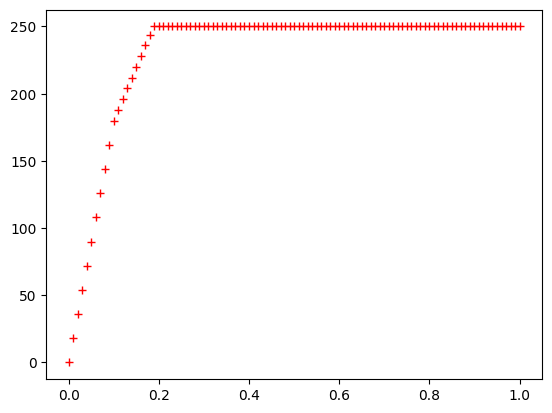

In [45]:
#graph of r vs dprofit
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(r, dprofit,'r+')

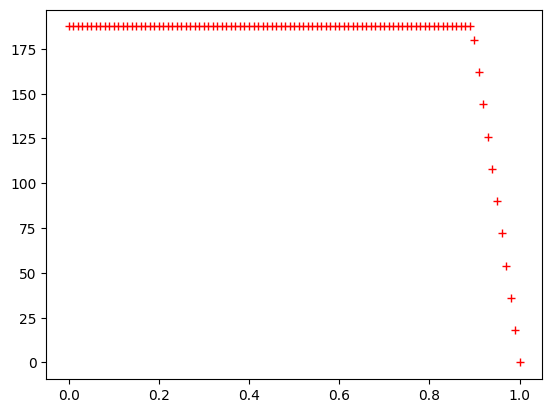

In [46]:
plt.plot(r, eprofit,'r+')

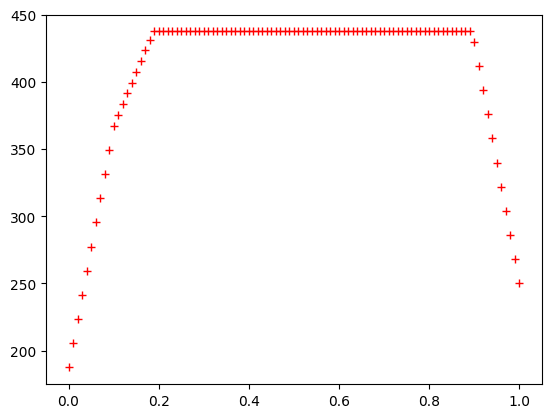

In [47]:
plt.plot(r, totalprofit,'r+')

In [48]:
max(dprofit), max(eprofit), max(totalprofit)

(250.0, 187.5, 437.5)

In [50]:
# problem for dual of refinery D
m = ConcreteModel()

m.x1 = Var(domain = NonNegativeReals)
m.x2 = Var(domain = NonNegativeReals)
m.x3 = Var(domain = NonNegativeReals)

m.constr1 = Constraint(expr = 4*m.x1 + 2*m.x2 + m.x3  >= 10)
m.constr2 = Constraint(expr =  2*m.x1 + 5*m.x2 + m.x3 >= 15)


# declaring objective function for optimization problem
m.profit = Objective(expr = 80*m.x1+60*m.x2+60*m.x3, sense=minimize)
m.pprint()

SolverFactory('glpk', executable='/usr/bin/glpsol').solve(m).write()
# display solution
print('\nprofit = ', m.profit())
print('\nDecision Variables')
print('x1 = ', m.x1())
print('x2 = ', m.x2())
print('x3 = ', m.x3())

print('\nConstraints')
print('Constraint 1 = ', m.constr1())
print('Constraint 2 = ', m.constr2())

3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 80*x1 + 60*x2 + 60*x3

2 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :  10.0 : 4*x1 + 2*x2 + x3 :  +Inf :   True
    constr2 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :  15.0 : 2*x1 + 5